# Loan Repayment Prediction

Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will employ  lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**Import of libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

## Get the Data

In [5]:
df = pd.read_csv("loan_data.csv")

## Data Inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
# Checking for nulls
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Exploratory Data Analysis

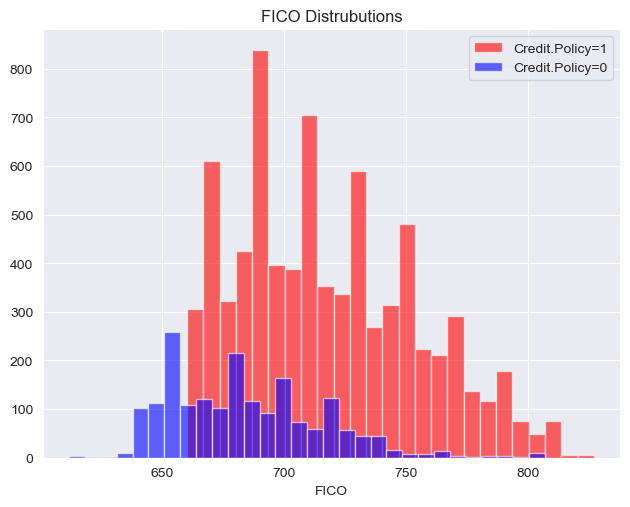

In [12]:
plt.figure()
df[df['credit.policy']==1]['fico'].hist(color = 'red', alpha =0.6,  bins = 30, label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(color = 'blue', alpha = 0.6, bins = 30, label='Credit.Policy=0')

plt.legend()
plt.tight_layout()
plt.title('FICO Distrubutions', fontsize=12)
plt.xlabel('FICO')

plt.show()

We can see that any customer with a FICO score of less than 660 does not meet the credit underwriting criteria of LendingClub.com

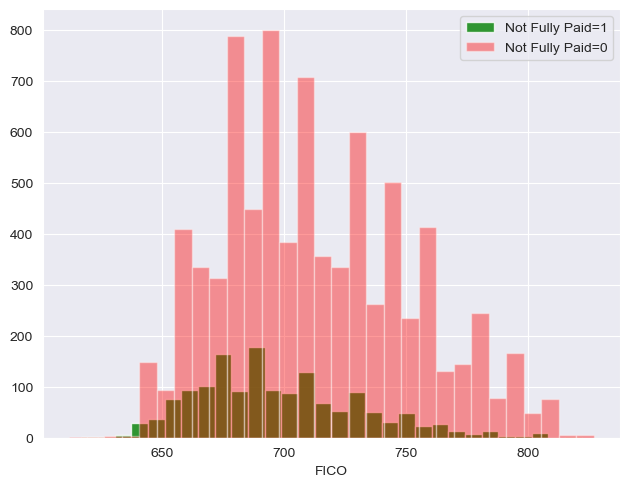

In [14]:
plt.figure()
df[df['not.fully.paid']==1]['fico'].hist(color = 'green', alpha =0.8,  bins = 30, label='Not Fully Paid=1')
df[df['not.fully.paid']==0]['fico'].hist(color = 'red', alpha = 0.4, bins = 30, label='Not Fully Paid=0')

plt.legend()
plt.tight_layout()
plt.xlabel('FICO')

plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

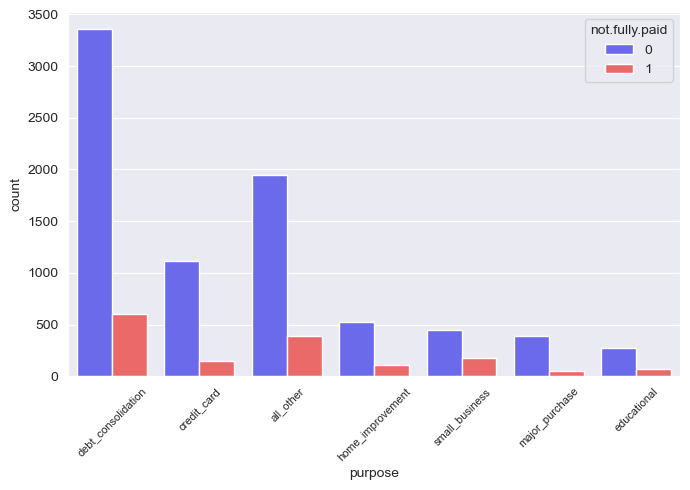

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'purpose', hue = 'not.fully.paid', palette= 'seismic')

plt.xticks(size = 8, rotation=45)

plt.tight_layout()

The graph shows that debt consolidation is the main reason behind why customers in this dataset are taking loans

<Figure size 1000x600 with 0 Axes>

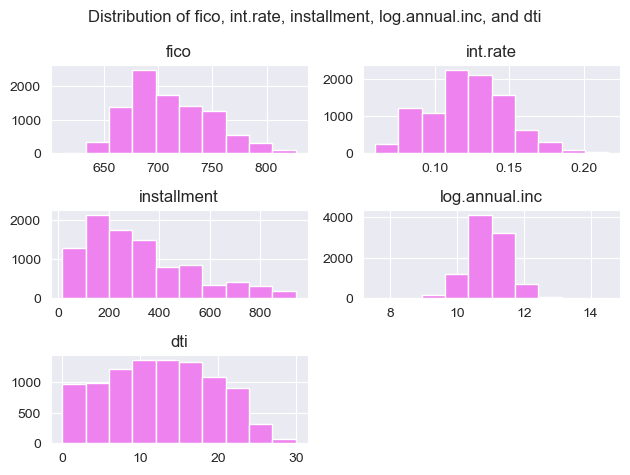

In [18]:
plt.figure(figsize=(10,6))
df[['fico', 'int.rate', 'installment', 'log.annual.inc', 'dti']].hist(color = 'violet')

plt.suptitle('Distribution of fico, int.rate, installment, log.annual.inc, and dti')
plt.tight_layout()
plt.show()

 Let's explore the trend between FICO score and interest rate.

<Figure size 600x400 with 0 Axes>

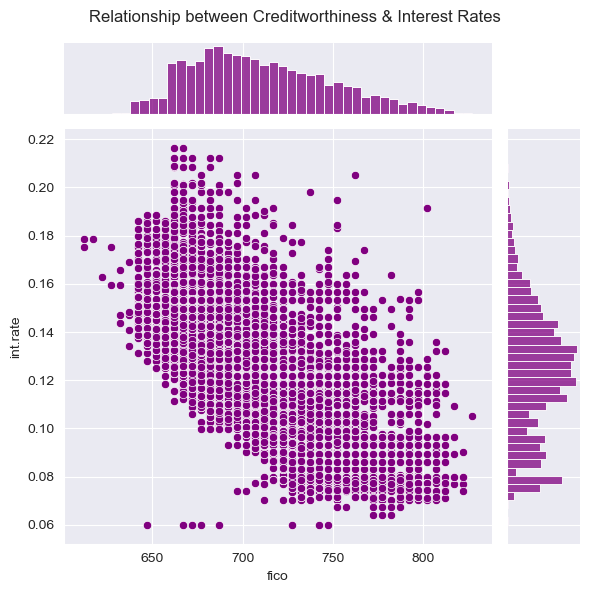

In [20]:
plt.figure(figsize=(6,4))

sns.jointplot(data = df, x='fico', y='int.rate', color = 'purple')

plt.suptitle('Relationship between Creditworthiness & Interest Rates')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

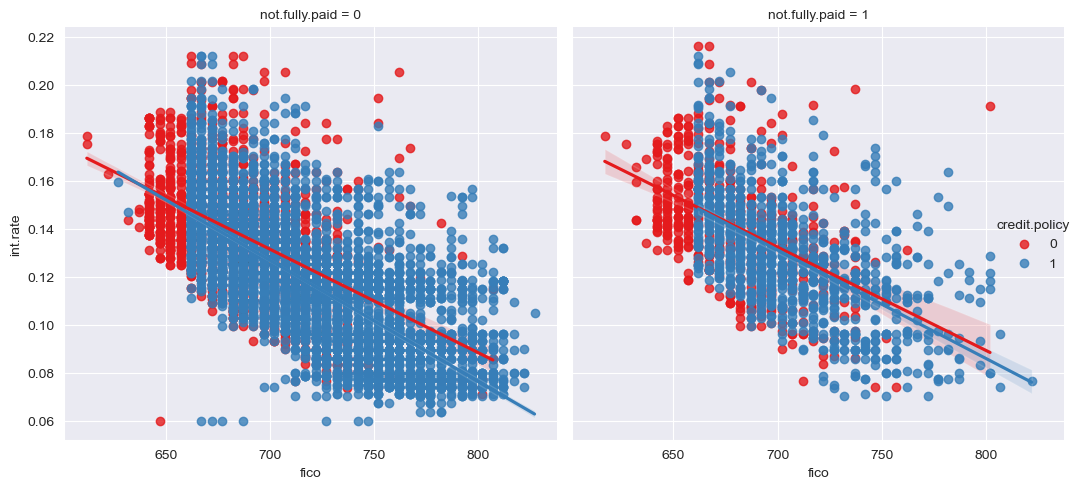

In [21]:
#lmplots to see if the trend differed between not.fully.paid and credit.policy. 

plt.figure()
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.tight_layout()
plt.show()

visualize correlations between numeric features like fico, int.rate, dti, and revol.util. 

This can help identify which features are strongly related to repayment outcomes.

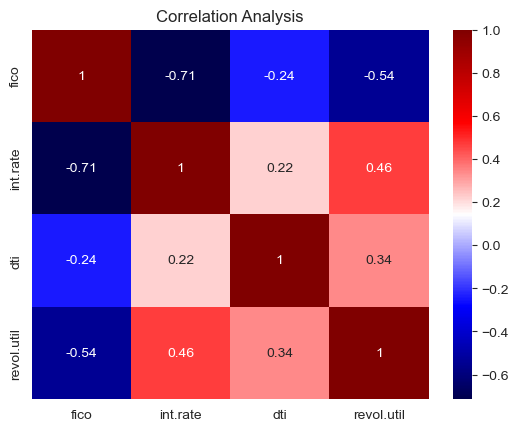

In [23]:
sns.heatmap(data = df[['fico', 'int.rate', 'dti', 'revol.util']].corr(), annot=True, cmap='seismic')

plt.title('Correlation Analysis', fontsize=12)
plt.show()

# Data Preparation

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Creation of Dummy Variables

In [27]:
cat_feats = ['purpose']
final_df=pd.get_dummies(data = df, columns=cat_feats, drop_first=True, dtype=float)
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [29]:
X = final_df.drop('not.fully.paid', axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [33]:
pred = dtree.predict(X_test)

In [34]:
print('Classification Report for Decision Trees\n')
print(metrics.classification_report(y_test, pred))

Classification Report for Decision Trees

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.19      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [35]:
dt_confusion_matrix=pd.DataFrame(metrics.confusion_matrix(y_test, pred, labels=None), index=['True 0 ', 'True  1'], 
                                 columns=['Predicted 0', 'Predicted 1'])
dt_confusion_matrix

,Predicted 0,Predicted 1
True 0,1977,454
True 1,334,109


In [36]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': dtree.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance.head(10)) 

             Feature  Importance
2        installment    0.127953
6  days.with.cr.line    0.122952
4                dti    0.120279
3     log.annual.inc    0.114056
7          revol.bal    0.109340
1           int.rate    0.104391
8         revol.util    0.100979
5               fico    0.071802
9     inq.last.6mths    0.041259
0      credit.policy    0.027125


## Training the Random Forest model


In [38]:
rf_tree = RandomForestClassifier(n_estimators=600)
rf_tree.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation of Random Forest Model

In [40]:
rf_pred = rf_tree.predict(X_test)

In [42]:
print('Classification Report for Random Forest \n')
print(metrics.classification_report(y_test, rf_pred))

Classification Report for Random Forest 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



Confusion Matrix for the Random Forests predictions.

In [44]:
rf_confusion_matrix=pd.DataFrame(metrics.confusion_matrix(y_test, rf_pred, labels=None), index=['True 0 ', 'True  1'], 
                                 columns=['Predicted 0', 'Predicted 1'])
rf_confusion_matrix

,Predicted 0,Predicted 1
True 0,2422,9
True 1,433,10


In [45]:
rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_tree.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
print(rf_importance.head(10))

             Feature  Importance
2        installment    0.116125
6  days.with.cr.line    0.113506
8         revol.util    0.113490
7          revol.bal    0.112777
4                dti    0.108388
3     log.annual.inc    0.108176
1           int.rate    0.103376
5               fico    0.077733
9     inq.last.6mths    0.054412
0      credit.policy    0.016326
